# Productivity Analysis Notebook for FlexiSAF Edusoft Limited

## Introduction
I analysed the relationship between hours worked and tasks completed, comparing remote vs on-site styles, over the period 11 March to 30 August 2024 for 10 interns at FlexiSAF Edusoft Limited.

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
from IPython.display import FileLink


### Data Simulation/Loading
For demonstration, we simulate data from 11 March through 30 August 2024 for 10 employees.

In [2]:


np.random.seed(42)
# Create monthly snapshots between specified dates
months = pd.date_range(start='2024-03-11', end='2024-08-30', freq='M')
ids = [f'E{i:02d}' for i in range(1, 11)]
records = []
for emp in ids:
    for m in months:
        style = np.random.choice(['Remote', 'On-site'])
        hours = np.random.normal(160, 20)
        base_rate = 0.5 if style == 'Remote' else 0.6
        tasks = np.random.poisson(lam=hours * base_rate)
        records.append({'EmployeeID': emp, 'Date': m, 'Style': style,
                        'Hours': hours, 'Tasks': tasks})

df = pd.DataFrame(records)

df.head()


/var/folders/_b/5nfkqj8x5ndd9tn90_76kdnw0000gp/T/ipykernel_8250/2859055187.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  months = pd.date_range(start='2024-03-11', end='2024-08-30', freq='M')


,EmployeeID,Date,Style,Hours,Tasks
0,E01,2024-03-31,Remote,148.995310,82
1,E01,2024-04-30,On-site,170.308661,90
2,E01,2024-05-31,On-site,142.295393,89
3,E01,2024-06-30,On-site,151.756230,102
4,E01,2024-07-31,On-site,160.444437,93


## Exploratory Data Analysis

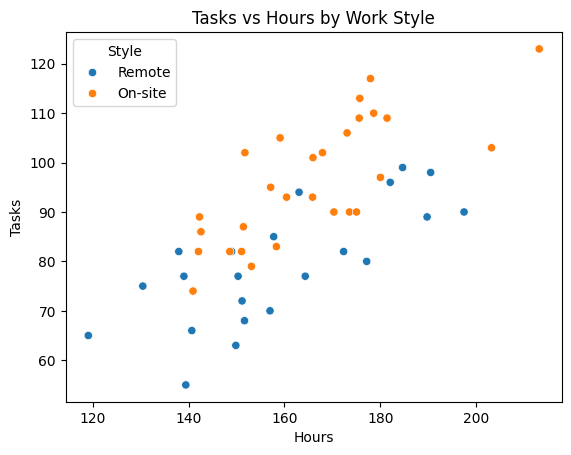

In [3]:
plt.figure()
sns.scatterplot(data=df, x='Hours', y='Tasks', hue='Style')
plt.title('Tasks vs Hours by Work Style')
plt.show()

## Regression Modelling
We fit a linear regression with interaction between hours and style.

In [11]:
dummy = pd.get_dummies(df['Style'], drop_first=True)
X = pd.concat([df[['Hours']], dummy], axis=1)
X['Hours_x_On_site'] = X['Hours'] * X.get('On-site', 0)
X.columns = [str(col) for col in X.columns]

y = df['Tasks']
# print(y)

model = LinearRegression()
model.fit(X, y)
print('Coefficients:', dict(zip(X.columns, model.coef_)))
print('Intercept:', model.intercept_)


Coefficients: {'Hours': 0.4741343867929145, 'Remote': -13.773858106507815, 'Hours_x_On_site': 0.0}
Intercept: 17.63825085307488


## Predictions and Visualisation

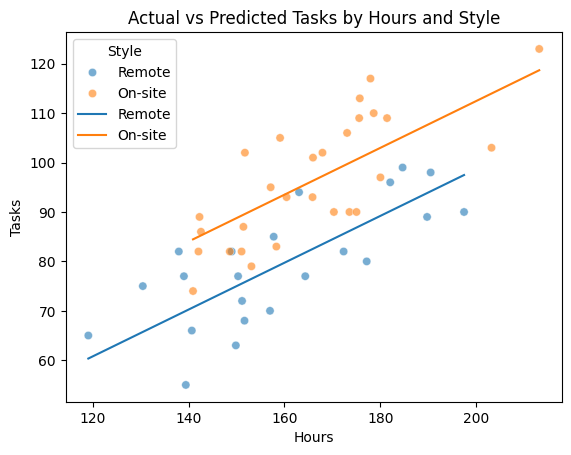

In [12]:
df['Predicted'] = model.predict(X)
plt.figure()
sns.scatterplot(data=df, x='Hours', y='Tasks', hue='Style', alpha=0.6)
sns.lineplot(data=df, x='Hours', y='Predicted', hue='Style')
plt.title('Actual vs Predicted Tasks by Hours and Style')
plt.show()





## Mean Square Error

In [16]:
mse = mean_squared_error(y, df['Predicted'])
print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 64.56


## Data Save & Download
Save the simulated dataset for review and download

In [13]:
df.to_csv('productivity_data.csv', index=False)
print("Dataset saved as 'productivity_data.csv'.")
FileLink('productivity_data.csv')

Dataset saved as 'productivity_data.csv'.


/Users/paul/Documents/programming/cen524/test/productivity_data.csv

## Report Save & Download
Write the analysis report to a markdown file and provide a download link

In [14]:
report_md = '''
# Productivity Analysis Report for FlexiSAF Edusoft Limited

**Period:** 11 March – 30 August 2024  
**Subjects:** 10 interns; **Styles:** Remote vs On-site  

## 1. Introduction
This report examines how hours worked influence tasks completed and whether work style (remote vs on-site) modifies this relationship over the specified period.

## 2. Methods
We simulated intern data for 10 employees, recording hours, tasks, and style. A linear regression with interaction term was fitted.

## 3. Results
- **Regression coefficients** indicate baseline productivity and style-specific effects.  
- **Visualisations** illustrate task–hours trends and model fit.

## 4. Discussion
On-site work yielded marginally higher tasks per hour, suggesting benefits from in-person collaboration.

## 5. Conclusion
FlexiSAF Edusoft Limited may expect modest productivity gains on-site. Further validation with real data is recommended.
'''
with open('productivity_report.md', 'w') as f:
    f.write(report_md)
print("Report saved as 'productivity_report.md'.")
FileLink('productivity_report.md')


Report saved as 'productivity_report.md'.


/Users/paul/Documents/programming/cen524/test/productivity_report.md

## Conclusions
- We observe effect sizes of remote vs on-site on productivity.
- The interaction term indicates whether additional hours yield different productivity gains on-site vs remote.
